In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/SMART KNOWER/mini_project/dataset

/content/drive/My Drive/SMART KNOWER/mini_project/dataset


Importing library files for pre-processing

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

Pre-processing of data

In [ ]:
target = [] 
images = [] # Matrix Format
flat_data = [] 
data_dir = '/content/drive/My Drive/SMART KNOWER/mini_project/dataset'

categories= ['daisy','sunflower','rose']

for i in categories:
  class_target = categories.index(i) # Label Encoded the Target value
  path = os.path.join(data_dir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(250,250,3)) # Skimage normalizes the value
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    #print(img_resized.shape)
#print(target)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

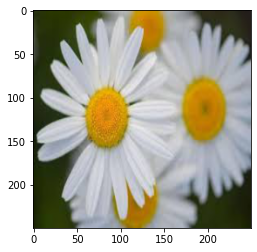

In [ ]:
plt.imshow(images[9])

Creating dataframe

In [ ]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,187461,187462,187463,187464,187465,187466,187467,187468,187469,187470,187471,187472,187473,187474,187475,187476,187477,187478,187479,187480,187481,187482,187483,187484,187485,187486,187487,187488,187489,187490,187491,187492,187493,187494,187495,187496,187497,187498,187499,Target
0,0.819247,0.811263,0.822008,0.824141,0.807420,0.810439,0.835600,0.798981,0.800173,0.844620,0.788125,0.771750,0.856737,0.782972,0.738674,0.868818,0.775342,0.695436,0.884507,0.772446,0.641034,0.897168,0.765638,0.569050,0.886596,0.748141,0.473161,0.887976,0.745459,0.385350,0.882597,0.737333,0.284735,0.871316,0.727584,0.187324,0.855005,0.715594,0.100880,0.838996,...,0.180392,0.313725,0.011765,0.180392,0.316024,0.007169,0.187710,0.324965,0.011239,0.192157,0.329412,0.015686,0.189435,0.326690,0.007522,0.188235,0.325490,0.003922,0.188235,0.325490,0.003922,0.185090,0.322345,0.000776,0.184314,0.321569,0.000000,0.184314,0.321569,0.000000,0.173608,0.318000,0.003569,0.172549,0.317647,0.003922,0.172549,0.317647,0.003922,0
1,0.777048,0.871935,0.859281,0.807255,0.902141,0.896948,0.835304,0.930190,0.927884,0.839052,0.929184,0.931448,0.832054,0.913592,0.926692,0.829608,0.907122,0.930273,0.839361,0.906382,0.955276,0.877957,0.923004,0.989661,0.889835,0.915474,0.999159,0.884460,0.898797,0.999974,0.880463,0.876272,0.999974,0.874316,0.869468,0.992537,0.872629,0.868000,0.940680,0.870234,...,0.772704,0.829112,0.934984,0.787835,0.836596,0.923263,0.785571,0.833155,0.886998,0.782016,0.833718,0.861117,0.778107,0.833534,0.834687,0.786547,0.843804,0.841439,0.806069,0.869819,0.877666,0.810440,0.875001,0.914231,0.817222,0.882360,0.950207,0.857607,0.921725,0.985361,0.894857,0.926037,0.996190,0.839849,0.867622,0.900627,0.755477,0.791955,0.725947,0
2,0.162965,0.489225,0.268951,0.220282,0.491827,0.349064,0.219514,0.401576,0.348667,0.280850,0.370685,0.361864,0.426817,0.453123,0.405111,0.582533,0.581575,0.428941,0.583013,0.590695,0.350541,0.538776,0.571498,0.309333,0.416689,0.476745,0.274472,0.239437,0.320284,0.228002,0.480130,0.570845,0.591291,0.796935,0.891951,0.981498,0.823498,0.921247,1.000000,0.861217,...,0.279780,0.410831,0.290871,0.323611,0.461984,0.302210,0.294623,0.435735,0.251641,0.315537,0.428871,0.218282,0.270742,0.380546,0.183496,0.231090,0.339255,0.158251,0.263887,0.367667,0.211845,0.284504,0.383578,0.258748,0.279838,0.374143,0.279355,0.209791,0.298811,0.234381,0.215333,0.299647,0.259757,0.230955,0.312858,0.286077,0.240786,0.323075,0.297103,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.430124,0.566265,0.472132,0.422105,0.540020,0.433139,0.451882,0.538894,0.419129,0.455109,0.513018,0.381315,0.432874,0.469799,0.339870,0.415812,0.450783,0.328427,0.493106,0.536275,0.446493,0.607906,0.670682,0.615686,0.663390,0.735694,0.709544,0.540190,0.614056,0.602602,0.431089,0.491622,0.483324,0.458147,0.501034,0.488223,0.460110,0.490839,0.471812,0.490511,...,0.019608,0.027451,0.015686,0.019608,0.027451,0.015686,0.016078,0.023922,0.012157,0.023529,0.043137,0.027451,0.023529,0.043137,0.027451,0.023529,0.043137,0.027451,0.023529,0.043137,0.027451,0.023529,0.043137,0.027451,0.023529,0.043137,0.027451,0.018014,0.036638,0.020952,0.005145,0.021475,0.005788,0.005145,0.021475,0.005788,0.005145,0.021475,0.005788,0
...,...,..

Setting input and output

In [ ]:
x = flat_data #we can't take images as input as it is in matrix format. Hence we use data which is flattened form of image
y = target
#print(type(x))
#print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([30, 30, 30]))

Seggregating data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0,stratify=y) #stratify to divide the set into proper proportions
print(x_train.shape)
print(x_test.shape)

(67, 187500)
(23, 187500)


In [ ]:
print(np.unique(y_train,return_counts=True))
print("\n")
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([22, 22, 23]))


(array([0, 1, 2]), array([8, 8, 7]))


Classification

In [ ]:
# to find which kernel is better
from sklearn.model_selection import GridSearchCV
svc = SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,1,10,100]
}
cv = GridSearchCV(svc,parameters,cv =5) #cross validation
cv.fit(x_train,y_train)
cv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
from sklearn.svm import SVC #support vector classifier
model = SVC(C=0.1, kernel='linear')
model.fit(x_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       0])

Evaluation

In [ ]:
# Evaluation
# multi-class classification
# diagonal elements are true values
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[8, 0, 0],
       [0, 8, 0],
       [0, 0, 7]])

In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
# Imbalanced Dataset
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



Checking if our model is working properly or not

In [ ]:
# Save the model using Pickle library
import pickle
pickle.dump(cv,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open("img_model.p",'rb'))

Testing with new images

Enter your URLhttps://tse4.mm.bing.net/th?id=OIP.e9eN4umhYkLi58dIx0tqGgHaF7&pid=Api&P=0&w=198&h=159
(159, 198, 3)
PREDICTED OUTPUT : sunflower


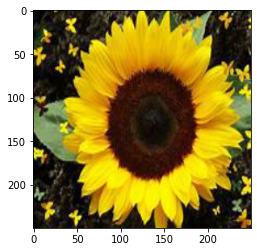

In [ ]:
# Testing a brand new Image 
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized=resize(img,(250,250,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')

Deployment

In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.5MB 11.6MB/s 
     |████████████████████████████████| 112kB 47.9MB/s 
     |████████████████████████████████| 4.6MB 47.9MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 163kB 47.2MB/s 
     |████████████████████████████████| 122kB 49.5MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=5e7343af37f56fefd0cb986fed43483a6a54ab75bb3f5c49ea21fcce7f026a38
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.4.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp36-none-any.whl size=15971 sha256=bd5e4fd91d9fc71a453880fd66b0b043328523f26540075a57605c6d3ed7b843
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import pickle
from PIL import Image

st.title('IMAGE CLASSIFICATION USING SKLEARN')
st.subheader('UPLOAD AN IMAGE')
model = pickle.load(open("img_model.p",'rb'))
uploaded_file = st.file_uploader("CHOOSE AN IMAGE",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img, caption='UPLOADED IMAGE')

  if st.button('PREDICT'):
    st.write("RESULTS...")
    categories= ['daisy','sunflower','rose']
    flat_data=[]
    img = np.array(img)
    img_resized=resize(img,(250,250,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    #st.write(img.shape)
    y_out = model.predict(flat_data)
    y_out = categories[y_out[0]]
    st.title(f'PREDICTED OUTPUT : {y_out}')

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

public_url = ngrok.connect(port='8501')
print(public_url)

nohup: appending output to 'nohup.out'
http://4ce68c5ccb37.ngrok.io
